#intro

PandasAI is a tool that makes data analysis easy and enjoyable. It uses pandas dataframes and advanced language models to let users perform data analysis in a conversational manner.

[PandasAI Github](https://github.com/gventuri/pandas-ai)

[Demo](https://colab.research.google.com/drive/1ZnO-njhL7TBOYPZaqvMvGtsjckZKrv2E?usp=sharing)


## Setup
To get started, we need to install the last version of PandasAI.

In [ ]:
!pip install pandasai pandas python-dotenv -q

##SmartDataframe
A SmartDataframe is a kind of dataframe in pandas (or polars) that has all the same capabilities as a regular pd.DataFrame, but it also includes conversational features.






In [ ]:
from pandasai import SmartDataframe

## Importing from a pandas dataframe

To import from a pandas dataframe, you need to import the pandas libraries and create a dataframe first.




In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#Connect To Open AI Api

To use OpenAI's API, all you need is an API key.
 You can use GPT-3.5 Turbo, which works well, or GPT-4 if you prefer, though it might be more than you need.

 To keep your API key safe, you can store it in a .env file.

In [ ]:
from pandasai.llm import OpenAI
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())



#Smart Data Frame in work

In [ ]:
sdf = SmartDataframe(df, config={"llm": llm})

In [ ]:
sdf[sdf['Country or region'] == 'United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128


In [ ]:
sdf.chat("Return the top 5 countries by score")

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
sdf.chat("What's the sum of the gdp of the 2 unhappiest countries?" )

0.332

In [ ]:
print(sdf.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data, using the provided dataframes (`dfs`).
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart you must save it as an image in /content/temp_chart.png and not show the chart.)
    If the user requests to create a chart, utilize the Python matplotlib library to generate high-quality graphics that will be saved directly to a file.
    At the end, return a dictionary of:
    - type (possible values "string", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Examples: 
        { "type": "string", "value": f"The highest salary is {highest_salary}." }
        or
        { "type": "number", "value": 125 }
        or
        { "type": "dataframe", "value": pd.DataFrame({...})

#Ploting

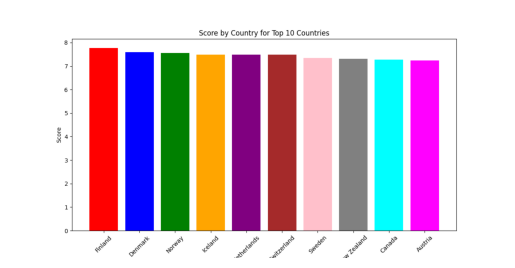

In [ ]:
sdf.chat("Plot a chart of the score by country for the top 10 countries, using a different color for each country.")

#Chain

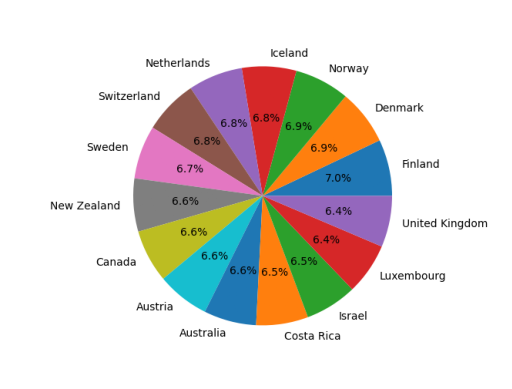

In [ ]:
sdf.chat("Return the top 15 countries by score").plot_pie_chart(labels="country", values="score")

#Working with multiple data frames [Smart Data Lake]

Pandas AI has the ability to combine data frames in one conversation using Smart Data Lake

In [ ]:
from pandasai import SmartDatalake
country_df = pd.read_csv("/content/2019.csv")
countires = SmartDataframe(country_df, name="countires")


billionaires_df = pd.read_csv("/content/forbes_2640_billionaires.csv")
billionaires = SmartDataframe(billionaires_df, name="billionaires")


lake = SmartDatalake([countires, billionaires], config={"llm": llm})
lake.chat("How many billionaires existis in top 5 happiest countries and what are there countries name and what the percentage of the total billionaires around the world")

'There are 40 billionaires in the top 5 happiest countries: Netherlands, Norway, Denmark, Finland, Iceland. This represents 1.52% of the total number of billionaires around the world.'

In [ ]:
print(lake.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data, using the provided dataframes (`dfs`).
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart you must save it as an image in /content/temp_chart.png and not show the chart.)
    If the user requests to create a chart, utilize the Python matplotlib library to generate high-quality graphics that will be saved directly to a file.
    At the end, return a dictionary of:
    - type (possible values "string", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Examples: 
        { "type": "string", "value": f"The highest salary is {highest_salary}." }
        or
        { "type": "number", "value": 125 }
        or
        { "type": "dataframe", "value": pd.DataFrame({...})

#LangChain LLMS

You can utilize LangChain LLMS instead of intricate OpenAI integration.

In [ ]:
!pip install pandasai[langchain] -q

Then you can use them as if they were PandasAI LLMs.

In [ ]:
from pandasai import SmartDataframe
from langchain.llms import OpenAI
# from langchain.llms import Anthropic
# from langchain.llms import LlamaCpp

langchain_llm = OpenAI(openai_api_key=os.environ['OPENAI_API_KEY'], max_tokens=1000)
langchain_sdf = SmartDataframe(df, config={"llm": langchain_llm})
langchain_sdf.chat("Which are the top 5 countries by score?")

,Overall rank,Country or region,Score
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488


## Working With Databases aka Connectors
Pandas AI has also added the capability to work with real databases under the name "Connectors."

To use a connector, you first need to install the required dependencies.

In [ ]:
!pip install pandasai[connectors] -q

In [ ]:
from pandasai.connectors import MySQLConnector, PostgreSQLConnector

# With a MySQL database
loan_connector = MySQLConnector(
    config={
        "host": "localhost",
        "port": 3306,
        "database": "mydb",
        "username": "root",
        "password": "root",
        "table": "loans",
        "where": [
            # this is optional and filters the data to
            # reduce the size of the dataframe
            ["loan_status", "=", "PAIDOFF"],
        ],
    }
)

# With a PostgreSQL database
payment_connector = PostgreSQLConnector(
    config={
        "host": "localhost",
        "port": 5432,
        "database": "mydb",
        "username": "root",
        "password": "root",
        "table": "payments",
        "where": [
            # this is optional and filters the data to
            # reduce the size of the dataframe
            ["payment_status", "=", "PAIDOFF"],
        ],
    }
)

df_connector = SmartDatalake([loan_connector, payment_connector], config={"llm": llm})
response = df_connector.chat("How many loans from the United states?")
print(response)

In [ ]:
from pandasai.connectors.yahoo_finance import YahooFinanceConnector

yahoo_connector = YahooFinanceConnector("MSFT")
df = SmartDataframe(yahoo_connector, config={"llm": llm})

response = df.chat("What is the closing price for yesterday?")
print(response)

The closing price for yesterday was 346.07000732421875.


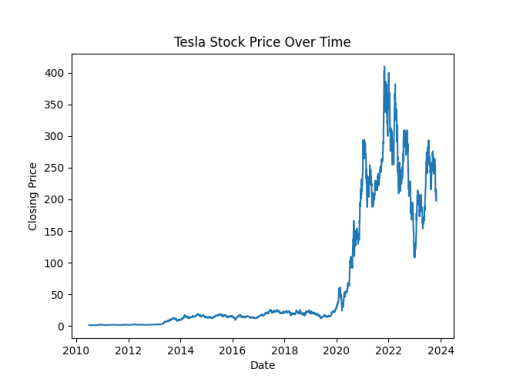

In [ ]:
yahoo_connector = YahooFinanceConnector("TSLA")

df_connector = SmartDataframe(yahoo_connector, config={"llm": llm})
response = df_connector.chat("Plot the chart of tesla over time")

#Agent

[working with agents  ](https://docs.pandas-ai.com/en/latest/examples/#working-with-agent)

**The chat agent keeps track of your conversation, so you can have natural and meaningful chats.**



Here are its main features:

**Remembering Context**: The agent never forgets what you've been talking about, making your conversations flow smoothly and stay on track.

**Get Clear Answers**: You can ask the agent to explain things further using the clarification_questions method. This helps you get a better grasp of the information.

**Detailed Explanations**: Use the explain method to get a deep dive into how the agent came up with a specific answer.

In [ ]:
import pandas as pd
from pandasai import Agent

from pandasai.llm.openai import OpenAI

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)


llm = OpenAI(os.environ['OPENAI_API_KEY'])
agent = Agent([employees_df, salaries_df], config={"llm": llm}, memory_size=10)

# Chat with the agent
response = agent.chat("Who gets paid the most?")
print(response)

# Get Clarification Questions
questions = agent.clarification_questions(query=response)

for question in questions:
    print(question)

# Explain how the chat response is generated
response = agent.explain()
print(response)

The employee who gets paid the most is Olivia.
What is the basis for determining who gets paid the most?
Is Olivia the only employee in the company?
Are there any other factors that determine how much an employee gets paid?
To analyze the data, we first need to combine two sets of data. We do this by merging the dataframes based on a common column called "EmployeeID". Once we have the merged dataframe, we can find the highest salary by looking at the "Salary" column and finding the maximum value. We then identify the employee who has this highest salary by looking at their name in the "Name" column. Finally, we return a statement saying that the employee who gets paid the most is [employee's name].


#Adding Skills to agent [Custome functions]

You can create your own functions for the agent, which will help it do more things. These custom functions work well with the agent's skills and let you define a variety of tasks

it's news things to panda ai so it still have some unexpacted restuls

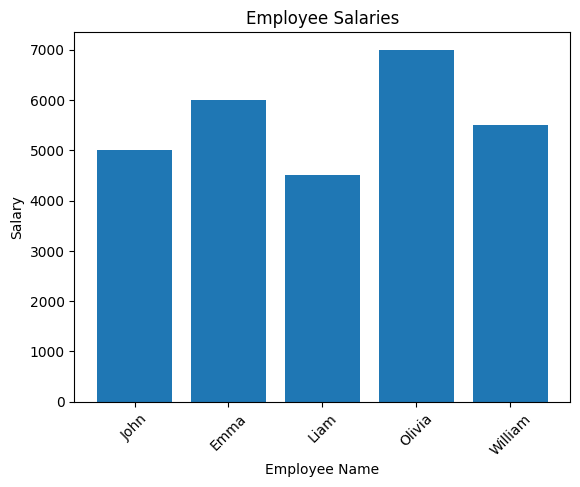

In [ ]:


import pandas as pd
from pandasai import Agent

from pandasai.llm.openai import OpenAI
from pandasai.skills import skill

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

# Function doc string to give more context to the model for use this skill
@skill
def plot_salaries(name: list[str], salaries: list[int]):
    """
    Displays the bar chart  having name on x axis and salaries on y axis
    Args:
        name (list[str]): Employee name
        salaries (list[int]): Salaries
    """
    # plot bars
    import matplotlib.pyplot as plt

    plt.bar(name, salaries)
    plt.xlabel("Employee Name")
    plt.ylabel("Salary")
    plt.title("Employee Salaries")
    plt.xticks(rotation=45)



llm = OpenAI(os.environ['OPENAI_API_KEY'])
agent = Agent([employees_df, salaries_df], config={"llm": llm}, memory_size=20)

agent.add_skills(plot_salaries(employees_df['Name'],salaries_df['Salary']))

# Chat with the agent
response = agent.chat("Plot the employee salaries against names, use diffrent colors for each bar")